In [35]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [251]:
X,y = make_blobs(n_samples=200, n_features=2, centers=[(-8,-8),(5,5),(-25,3), (20,-5)])

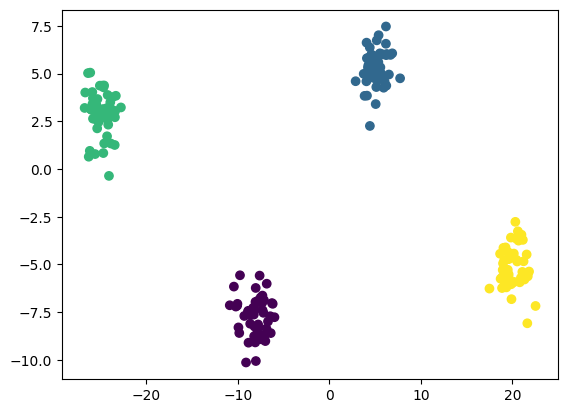

In [252]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

# Steps of KMeans clustering
1. Decide n clusters
2. Init centroids
3. Assign clusters
4. Move centroids
5. Check if previous centroids change. Finish if previous centroid not changed else begin from step 3 

In [253]:
import random
class KMeans:
    def __init__(self, max_iter=200, n_clusters=2):
        self.max_iter = max_iter
        self.n_clusters=n_clusters
        self.centroids = None
        
    def findDist(self, x, y):
        return np.sqrt(np.dot(x-y, x-y))
    def fit_predict(self, X_train):
        # Decide n clusters randomly and init centroids
        self.centroids = X_train[random.sample(range(0,X.shape[0]),self.n_clusters)]
        # print(self.centroids)
        # assign clusters
        y_pred = None
        print(self.max_iter)
        for i in range(self.max_iter):
            cluster_groups = []
            for row in X_train:
                cluster_group, curr_dist = None, 1e120
                distances = []
                for indx, centroid in enumerate(self.centroids):
                    dist = self.findDist(row, centroid)
                    distances.append(dist)
                min_distance = min(distances)
                cluster_group = distances.index(min_distance)
                cluster_groups.append(cluster_group)
            # Move centroids
            old_centroids = self.centroids.copy()
            new_centroids = []
            unique_groups = np.unique(cluster_groups)
            # print(unique_groups)
            for type in unique_groups:
                new_centroids.append(X[cluster_groups == type].mean(axis=0))
            self.centroids = np.array(new_centroids)
            # print(self.centroids)
            # Check if previous centroids change. Finish if previous centroid not changed else begin from step 3 
            y_pred = np.array(cluster_groups)
            res = True
            # if (np.array_equal(np.sort(old_centroids), np.sort(self.centroids))):
            #     print(old_centroids)
            #     print(self.centroids)
            #     break
        return y_pred
            

200


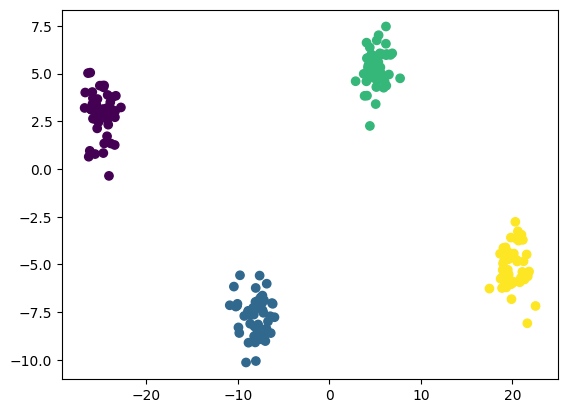

In [255]:
kMeans = KMeans(max_iter=200, n_clusters=4)
y_pred = kMeans.fit_predict(X)
# print(y_pred)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.show()

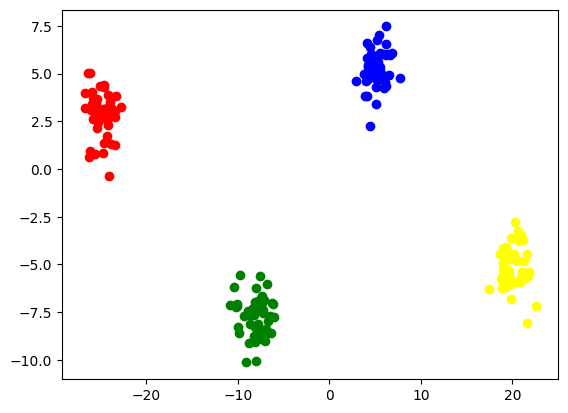

In [256]:
from sklearn.cluster import KMeans
kMeans = KMeans(max_iter=3, n_clusters=4)
y_means = kMeans.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()